# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [185]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [186]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [187]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[['city', 'country']]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [188]:
# Q2: how to get the first 5 rows of the "city" column?
df['city'][:5]

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [189]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [190]:
# Q4: how to use .loc to select the first row in "country" column?
df.loc[0, 'country']

'United Kingdom'

In [191]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df.loc[:4, ['city', 'date']]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24
4,Hounslow,05/14/2014 11:38


### Using .iloc[ ]

In [192]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[3][2]

'05/14/2014 11:24'

In [193]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [194]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [195]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['is_munich'] = [city == "Munich" for city in df['city']]
df

,lat,lon,date,city,country,is_munich
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom,False
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal,False
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal,False
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal,False
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal,False
...,...,...,...,...,...,...
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey,False
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey,False
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey,False
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey,False


In [196]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 
df_not_barcelona = pd.DataFrame(set([city for city in df['city'] if city != "Barcelona"]), columns=['city'])
df_not_barcelona

,city
0,Peloponnese
1,Zendek
2,Titisee-Neustadt
3,Aveiro District
4,Kammerstein
...,...
85,Kolin
86,Eutingen im Gäu
87,Azambuja
88,Sintra


In [197]:
# Q11: select rows where either the city is munich, or the country is serbia
print(df[(df['is_munich']) | (df['country'] == 'Serbia')])

           lat        lon              date       city  country  is_munich
139  44.821164  20.289821  06/21/2014 01:59   Belgrade   Serbia      False
140  44.820414  20.463465  06/21/2014 18:44   Belgrade   Serbia      False
141  44.761583  19.577904  06/22/2014 07:58  Slepčević   Serbia      False
177  48.357110  11.791346  07/09/2014 13:20     Munich  Germany       True


In [198]:
# Q12: how many observations are west of the prime meridian?
len(df[df['lon'] < 0])

24

In [199]:
# Q13: get all rows that contain a city that starts with the letter G
df[df['city'].str.match("G")]

,lat,lon,date,city,country,is_munich
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland,False
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany,False
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany,False
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania,False


In [200]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
print("Unique cities: " + str(len(set(df['city']))))
print("Unique countries: " + str(len(set(df['country']))))

num_missing = 0
for column in df:
    for cell in column:
        if cell in ['NaN', None]:
            num_missing += 1

print("There are " + str(num_missing) + " missing values")

Unique cities: 91
Unique countries: 15
There are 0 missing values


In [201]:
# Q15: group by country name and show the city names in each of the country
df.groupby(['country'])[['city']].apply(lambda row: row[:])

city
country                                 
Albania                151         Berat
                       152   Gjirokastër
Bosnia and Herzegovina 142      Sarajevo
                       143      Sarajevo
                       144        Mostar
...                                  ...
Turkey                 173      Istanbul
                       174      Istanbul
                       175      Istanbul
                       176      Istanbul
United Kingdom         0    West Drayton

[178 rows x 1 columns]

## Part 3 <br /> How to select based on a date-time values

In [202]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [203]:
# Q16: is the timestamp index unique? How can you use code to find it?
dt.index.has_duplicates

True

In [204]:
# Q17: drop duplicate index 
dt = dt.index.drop_duplicates()

In [205]:
# Q18: create a weekday and a weekend dataframe
# not sure what this is looking for...
df_weekday = pd.DataFrame({'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 'frequency': [0] * 7})
df_weekday

,day,frequency
0,Monday,0
1,Tuesday,0
2,Wednesday,0
3,Thursday,0
4,Friday,0
5,Saturday,0
6,Sunday,0


Text(0.5, 1.0, 'Frequency of GPS readings by weekday')

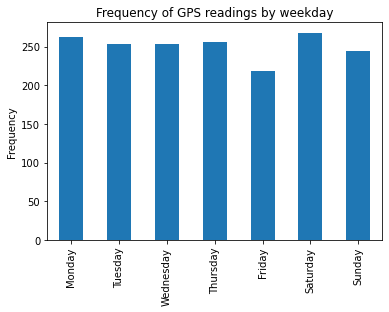

In [206]:
# Q19: calculate and plot the number of observations each day of the week has
dt.day_name().value_counts().loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar()
plt.ylabel("Frequency")
plt.title("Frequency of GPS readings by weekday")